# Föreläsning 4

# Simultana fördelningar
Simultana fördelningar är fördelningar som är beroende av varandra. Detta innebär att vi kan hantera fall där ett slumförsök är beroende av ett annat slumförsök. 

## Exempel 1
Vi har en tärning som har 6 sidor. Vi kastar tärningen 2 gånger. Vi vill nu beräkna sannolikheten att vi får en 1:a på båda kasten.

### Lösning
Vi kan använda oss av följande sannolikhetstabell:

| | 1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|
| 1 | 1/36 | 1/18 | 1/12 | 1/9 | 5/36 | 1/6 |
| 2 | 1/18 | 1/9 | 5/36 | 1/6 | 1/6 | 5/36 |
| 3 | 1/12 | 5/36 | 1/6 | 5/36 | 1/6 | 1/9 |
| 4 | 1/9 | 1/6 | 5/36 | 1/6 | 5/36 | 1/12 |
| 5 | 5/36 | 1/6 | 1/6 | 5/36 | 1/9 | 1/18 |
| 6 | 1/6 | 5/36 | 1/9 | 1/12 | 1/18 | 1/36 |

Från tabellen ser vi att sannolikheten att få en 1:a på båda kasten:

$$ Pr(1,1) = \frac{1}{36} $$


<Figure size 1000x1000 with 0 Axes>

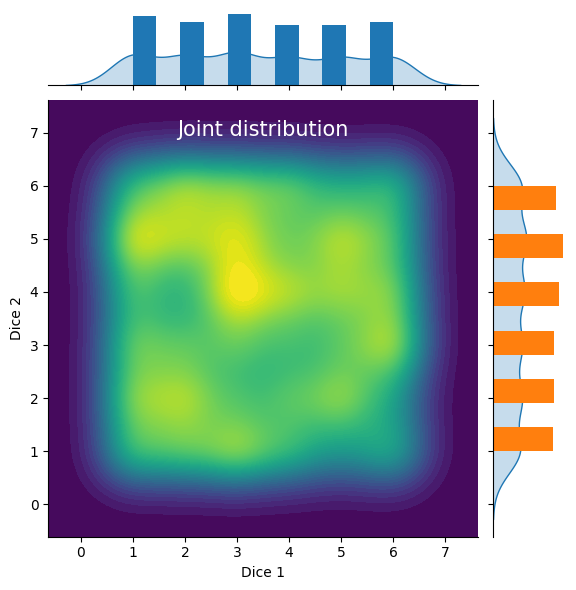

In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Create a plot showing the simultaneous probability of two dice rolls and their marginal probabilities
nbr_rolls = 1000
margin1 = np.random.randint(1,7, size=nbr_rolls)    # marginal distribution for dice 1
margin2 = np.random.randint(1,7, size=nbr_rolls)    # marginal distribution for dice 2

# Create a joint distribution
joint = np.zeros((6,6))
for i in range(nbr_rolls):
    joint[margin1[i]-1,margin2[i]-1] += 1

# sns.heatmap(joint, annot=True, fmt="d")


penguins = sns.load_dataset("penguins")

# Plot joint distribution
plt.figure(figsize=(10,10))
# sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")
# sns.jointplot(data=joint, kde=False, norm_hist=True, bins=11)


df = pd.DataFrame({'x': margin1, 'y': margin2})
p = sns.jointplot(data=df, x="x", y="y", kind="kde", fill=True, thresh=0, levels=100, cmap="viridis")
p.ax_marg_x.hist(margin1, bins=11, density=True, color="C0")
p.ax_marg_y.hist(margin2, bins=11, density=True, color="C1", orientation="horizontal")

plt.title('Joint distribution', y=0.9, fontsize=15, color='white')
plt.xlabel('Dice 1')
plt.ylabel('Dice 2')
plt.show()


# Create a plot showing the simultaneous probability of two dice rolls and their marginal probabilities
nbr_rolls = 1000



## Kovarians
För att beskriva hur slumpvariabler är beroende av varandra kan vi använda oss av kovariansen. Kovariansen är en mått på hur mycket två slumpvariabler är beroende av varandra. Kovariansen är definierad som:

$$ Cov(X,Y) = E[(X-\mu_X)(Y-\mu_Y)] $$
$$ = E[XY] - E[X]E[Y] $$
$$ = \sum_{x,y}x\cdot y\cdot Pr(x,y) - \mu_X\mu_Y $$

Man kan också uttryck kovariansen som:

$$ Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})$$

Där $n$ är antalet observationer och $\bar{x}$ och $\bar{y}$ är medelvärdena för $X$ och $Y$.

### Simulera kovarians

In [8]:
# Generera korrellerade slumpvariabler
np.random.seed(0)   # Fixa seed för att få samma resultat varje gång

# Parametrar för korrelationen
mean = [0, 0]
cov = [[1, 0], [0, 1]]          # diagonal matrix, dvs oberoende variabler
# cov = [[1, 0.5], [0.5, 1]]      # Positivt korrelerade variabler
# cov = [[1, -0.5], [-0.5, 1]]    # Negativt korrelerade variabler
# cov = [[1, 1], [1, 1]]          # Perfekt korrelerade variabler

# Generera slumpvariabler
x, y = np.random.multivariate_normal(mean, cov, nbr_rolls).T
cov_df = pd.DataFrame({'x': x, 'y': y})

# Beräkna korrelationen
corr = np.corrcoef(x, y)
print('Korrelationen är: ', corr[0,1])


Korrelationen är:  -0.013925327595498789


<Figure size 1000x1000 with 0 Axes>

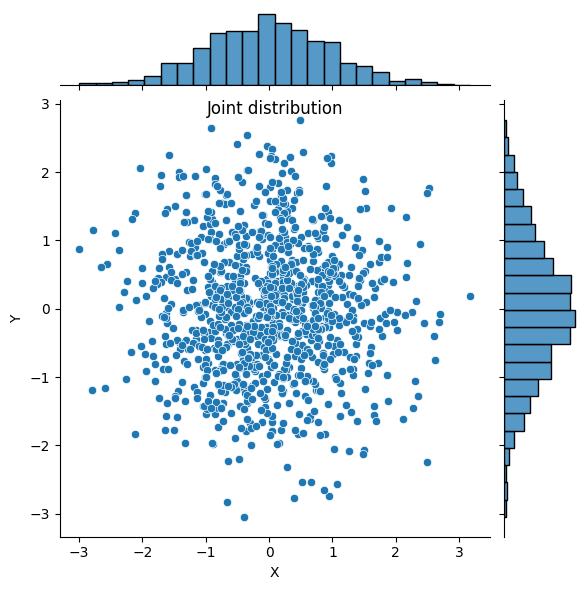

In [9]:

# Plotta slumpvariablernas fördelningar
plt.figure(figsize=(10,10))
p = sns.jointplot(data=cov_df, x="x", y="y", kind="scatter")

plt.title('Joint distribution', x=0.5, y=.95)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Exempel Iris
Om vi återkommer till iris datan för att se hur olika bladegenskaper är beroende av varandra. 



<Figure size 1000x1000 with 0 Axes>

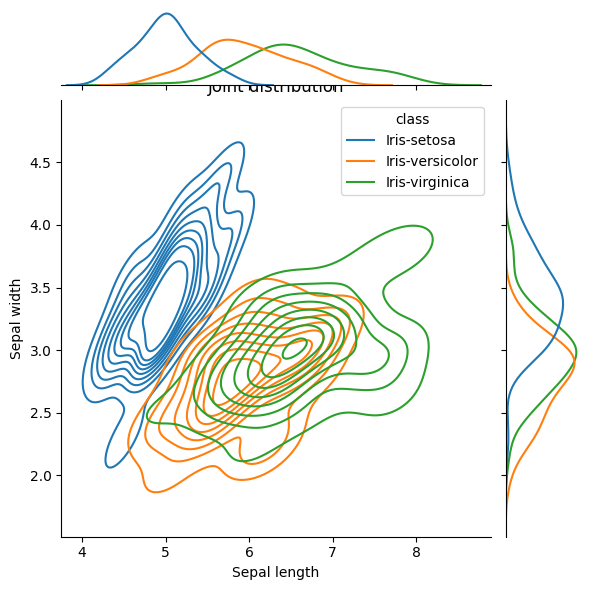

In [10]:
df_iris = pd.read_csv('./data/iris.csv')

# Plot joint distribution
plt.figure(figsize=(10,10))
sns.jointplot(data=df_iris, x="sepallength", y="sepalwidth", kind="kde", hue="class")
plt.title('Joint distribution')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


<Figure size 1000x1000 with 0 Axes>

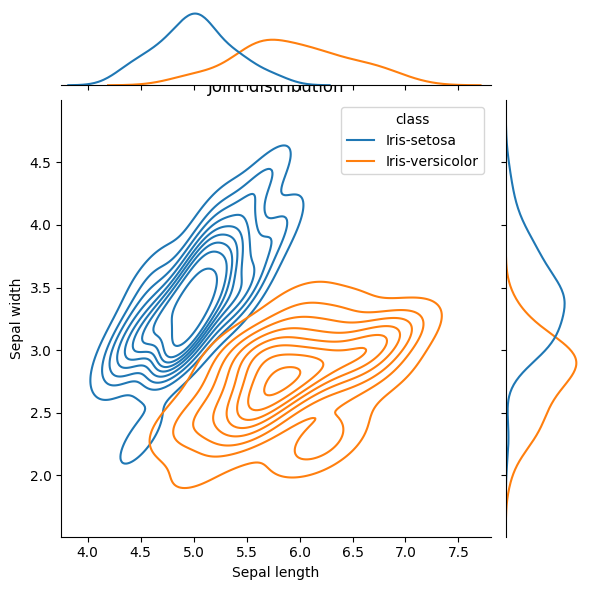

In [11]:
# Only plot Iris-setosa and Iris-versicolor
df_2_class = df_iris[df_iris['class'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Plot joint distribution
plt.figure(figsize=(10,10))
sns.jointplot(data=df_2_class, x="sepallength", y="sepalwidth", kind="kde", hue="class")
plt.title('Joint distribution')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


# Betingad sannolikhet
Betingad sannolikhet är en sannolikhet som beror på en annan sannolikhet. Detta innebär att vi kan hantera fall där ett slumförsök är beroende av ett annat slumförsök.

I iris datan så har vi 3 olika blomtyper. Vi kan nu beräkna sannolikheten att en blomma har en viss bladlängd givet att blomman är av en viss typ. Ovan såg vi att Iris-setosa och Iris-veriscolor har tydliga skillnader i sina foderblad. Låt oss nu titta på ett exempel där vi försöker beräkna sannolikheten att en blomma har en viss bladlängd givet att blomman är av typen Iris-setosa.

#### Exempel
Vi vill beräkna sannolikheten att en blomma är en Iris setosa givet att dess foderblad (sepal leaf) har en längd på högst $5$ cm (på fallet med bara två klasser).

$$Pr(\text{Klass = Iris Setosa} \ \ | \ \ \text{foderblads längd} < 5 cm) \ = \ ?$$

Vi låter $A$ vara händelsen att blomman är en Iris setosa och $B$ vara händelsen att foderbladet har en längd på högst $5$ cm. Vi kan då skriva följande:

$$Pr(A \ \ | \ \ B) = \frac{Pr(A \cap B)}{Pr(B)}$$

Vi kan nu beräkna $Pr(A \cap B)$ genom att filtrera datan på de blommor som har en foderbladslängd på högst $5$ cm. Vi får då följande:

$$Pr(A \cap B) = \frac{20}{100} = 0.2$$


In [12]:
# Given sepal length and sepal width less than 5, what is the probability of the flower being Iris-setosa?

# Calulate the probability of the flower being Iris-setosa
# P(A|B) = P(A and B) / P(B)

# P(class = Iris-setosa and sepal length < 5)
p_A_and_B = len(df_2_class[(df_iris['class'] == 'Iris-setosa') & (df_iris['sepallength'] < 5)]) / len(df_iris)
print('P(class = Iris-setosa and sepal length < 5) =', p_A_and_B)


P(class = Iris-setosa and sepal length < 5) = 0.13333333333333333




Vi kan nu beräkna $Pr(B)$ genom att filtrera datan på de blommor som har en foderbladslängd på högst $5$ cm. Vi får då följande:

$$Pr(B) = \frac{21}{100} = 0.21$$



In [13]:
# P(sepal length < 5)
p_B = len(df_2_class[df_2_class['sepallength'] < 5]) / len(df_2_class)
print('P(sepal length < 5) =', p_B)


P(sepal length < 5) = 0.21




Vi får då följande:

$$Pr(A \ \ | \ \ B) = \frac{Pr(A \cap B)}{Pr(B)} =  \frac{0.133}{0.21} = 0.635$$


In [14]:

# P(class = Iris-setosa | sepal length < 5)
p_A_given_B = p_A_and_B / p_B
print('P(class = Iris-setosa | sepal length < 5) =', p_A_given_B)


P(class = Iris-setosa | sepal length < 5) = 0.6349206349206349


# Web scraping
Ett sätt att samla in data från webbsidor är genom en "skrapning" av hemsidan. I python finns det flera olika biblotek för detta ändemålet men vi kommer att använda `BeautifulSoup`. 

Vi kommer att ta fram data från *Imdb* som är en databas över filmer och tv-serier. Vi kommer att ta fram data om de 250 mest populära filmerna just nu, [imdb top 250](https://www.imdb.com/chart/top/?ref_=nv_mv_250).

In [ ]:
# Install beautifulsoup4
!pip install beatifulsoup4

ERROR: Could not find a version that satisfies the requirement beatifulsoup4 (from versions: none)
ERROR: No matching distribution found for beatifulsoup4


In [ ]:
# Import libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#### Ladda hemsida

In [ ]:
# Load the webpage content of imdbs' top 250 movies and scrape the data
webpage = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')

# Create a BeautifulSoup object
soup = BeautifulSoup(webpage.content, 'html.parser')

# print html content
print(soup.prettify())


<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 250 Movies - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/chart/top/" rel="canonical"/>
  <meta content="http://www.imdb.com/chart/top/" property="og:url">
   <script>
  

#### Hitta intressanta taggar
För att kunna skrapa data från en webbsida behöver vi veta vilka taggar som innehåller den information vi vill ha. Detta kan vi göra genom att använda webbläsarens inspektionsverktyg. Genom att högerklicka på en del av sidan och välja "inspektera" så kommer vi åt en meny där vi kan se vilka taggar som innehåller den information vi vill ha.

![data/inspect.png](data/inspect.png "Webbläsarens inspektionsverktyg")

In [ ]:

# Manipulate the string to extract the movie titles, rank and raiting
titles = soup.find_all('td', class_='titleColumn') 
t_0 = titles[0]
print(f"Raw title: \n{t_0}\n")  # print raw title

Raw title: 
<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">Nyckeln till frihet</a>
<span class="secondaryInfo">(1994)</span>
</td>



In [ ]:
print(f"Title without tags: \n{t_0.text}\n")  # print title in text format

Title without tags: 

      1.
      Nyckeln till frihet
(1994)




#### Parsa strängar från `BeautifulSoup`

In [ ]:
# Parse strings to extract movie title, rank and year
movie_titles = [i.text for i in titles]
movie_titles = [i.replace('\n', '') for i in movie_titles]
movie_titles = [i.strip() for i in movie_titles]
movie_titles = [i.replace('  ', '') for i in movie_titles]
movie_rank = [i.split('.')[0] for i in movie_titles]
movie_year = [i.split('(')[-1].replace(')', '') for i in movie_titles]

movie_titles = [i.split('(')[0] for i in movie_titles]
movie_titles = [i.split('.')[1] for i in movie_titles]

# Create pandas dataframe with the movie titles, rank, and year
movies = pd.DataFrame({
    'movie_titles': movie_titles,
    'movie_rank': movie_rank,
    'movie_year': movie_year
    },
    index=movie_rank
)

movies

,movie_titles,movie_rank,movie_year
1,Nyckeln till frihet,1,1994
2,Gudfadern,2,1972
3,The Dark Knight,3,2008
4,Gudfadern del II,4,1974
5,12 edsvurna män,5,1957
...,...,...,...
246,Vägvisaren,246,1975
247,Aladdin,247,1992
248,Niceville,248,2011
249,Järnjätten,249,1999


### Lägg till raiting

In [ ]:

# Extract the movie ratings
raitings = soup.find_all('td', class_='ratingColumn imdbRating')
movie_ratings = [i.get_text() for i in raitings]
movie_ratings = [i.replace('\n', '') for i in movie_ratings]
movie_ratings = [i.strip() for i in movie_ratings]

# Add the movie ratings to the dataframe
movies['movie_ratings'] = movie_ratings

movies

movies.iloc[142:145,:]

,movie_titles,movie_rank,movie_year,movie_ratings
143,Spider-Man: No Way Home,143,2021,8.2
144,Yojimbo,144,1961,8.1
145,Shutter Island,145,2010,8.1


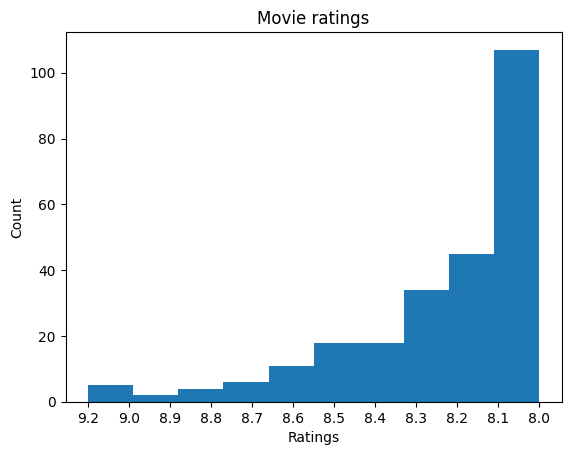

In [ ]:
# Plot movie ratings in histogram
plt.hist(movies['movie_ratings'], bins=10)
plt.title('Movie ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


### Vilken datatype har vår data?
När vi använt en scraper för att hämta data från en webbsida så får vi oftast en lista med strängar. Detta är inte så praktiskt att arbeta med. Vi vill helst jobba med numeriska värden i `pandas`-dataframes. Vi kan använda `pandas`-funktionen `to_numeric` för att konvertera strängar till numeriska värden.

In [ ]:
# Get types of columns
print(f"Data types of columns: \n{movies.dtypes}\n")

# Get type of specific element
print(f"\nData type of specific element: {type(movies.iloc[3,3])}")

Data types of columns: 
movie_titles     object
movie_rank       object
movie_year       object
movie_ratings    object
dtype: object


Data type of specific element: <class 'str'>


Konvertera de kolumner som innehåller numeriska värden till numeriska värden för att kunna göra beräkningar på dem.

In [ ]:
# Convert the dataframe to numeric values
movies[['movie_ratings', 'movie_rank', 'movie_year']] = movies[['movie_ratings', 'movie_rank', 'movie_year']].apply(pd.to_numeric)

print(f"Data types after conversion: \n{movies.dtypes}")

Data types after conversion: 
movie_titles      object
movie_rank         int64
movie_year         int64
movie_ratings    float64
dtype: object


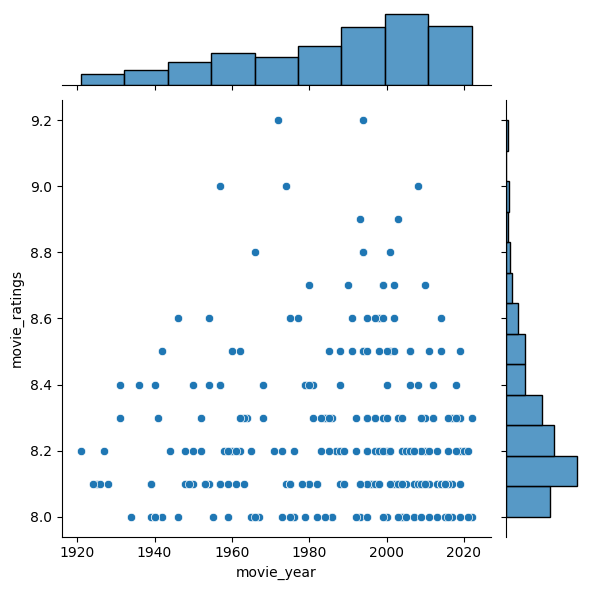

In [ ]:
# Joint plot of movie raiting and year
import seaborn as sns
sns.jointplot(x=movies['movie_year'], y=movies['movie_ratings'], kind='scatter')
plt.show()


# Normalfördelningen
Normalfördelningen är kanske den vanligast förekommande sannolikhetsfördelningen i naturen. Den är också den som används som utgångspunkt för många andra fördelningar. 

Normalfördelningen är en kontinuerlig fördelning och har en s.k. "klockform". Normalfördelningen har ett medelvärde $\mu$ och en standardavvikelse $\sigma$. Normalfördelningen är definierad som
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

### Normalfördelningens egenskaper
Normalfördelningen har ett antal egenskaper som är viktiga att känna till.

* Normalfördelningen är symmetrisk kring medelvärdet $\mu$.
* Standardavvikelsen $\sigma$ anger hur mycket fördelningen är spridd. Ju större $\sigma$ är, desto mer spridd är fördelningen.
* Många andra fördelningar kan approximeras av normalfördelningen.
* Matematiska egenskaper som gör den lätt att arbeta med.




In [ ]:
# Create a figure using opencv tarckbar to show normal distribution with different parameters
import numpy as np
import cv2 
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib qt

# Empty function for opencv trackbar
def nothing(x):
    pass

# Create a normal distribution with mean mu and standard deviation sigma
def normal_distribution(mu, sigma, start=-10, end=10, step=0.1):
    x = np.arange(start=start, stop=end, step=step)
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return x, y

# Create a figure using opencv tarckbar to show normal distribution with different parameters
def draw_normal_dist(start, end, step, mu, sigma):
    # Create a black image to inialized the figure
    img = np.zeros((1,512,3), np.uint8)
    # Create a window
    cv2.namedWindow('image')
    # Create trackbars for color change
    cv2.createTrackbar('mu','image',start*10,end*10,nothing)
    cv2.setTrackbarMin('mu','image',start * 10)
    cv2.createTrackbar('sigma','image',1,30,nothing)
    cv2.setTrackbarMin('sigma','image',1)
    
    # Create plot
    try:
        while(1):
            cv2.imshow('image',img)
            k = cv2.waitKey(1) & 0xFF
            if k == 27:
                break

            # get current positions of four trackbars
            mu_10 = cv2.getTrackbarPos('mu','image')
            sigma_10 = cv2.getTrackbarPos('sigma','image')
            mu = mu_10 / 10
            sigma = sigma_10 / 10
            
            # Get the normal distribution
            x, y = normal_distribution(mu, sigma, start, end, step)
            # Plot the normal distribution
            plt.plot(x, y)
            plt.title(f'Normal Distribution with $\mu$={mu} and $\sigma$={sigma}')
            plt.xlim(start, end)
            plt.ylim(0, 1)
            plt.draw()
            plt.pause(0.0001)
            plt.clf()
    except:  
        cv2.destroyAllWindows()
        plt.close()


# Starting parameters for the normal distribution
start = -20
end = 20
step = 0.1
mu = 0
sigma = 1

# Draw the normal distribution        
draw_normal_dist(start=start, end=end, step=step, mu=mu, sigma=sigma)


## Normalfördelningar i verkligheten

Låt oss titta på ett exempel där normalfördelningen tillämpas.

På högskoleprovet vill man att varje provs provresultat ska vara lika svårt att uppnå oavsett vid vilket provtillfälle man utför det. Detta för att undvika att någon grupp studenter har en fördel gentemot andra. Detta uppnås genom att vikta provresultaten så att de följer en normalfördelning. 

#### Komma åt data
För att läsa in data med resultat från högskoleprovet kommer vi använda oss av `BeautifulSoup`. Hemsidan som vi ska hämta data ifrån är [Normeringstabell 2015](https://www.studera.nu/hogskoleprov/fpn/normeringstabeller-varen-2015/).

In [ ]:
# Webb scrape data från normeringstabellen av högskoleprovet
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Hämta hemsidans innehåll
url = 'https://www.studera.nu/hogskoleprov/fpn/normeringstabeller-varen-2015/'
webpage = requests.get(url)
soup = BeautifulSoup(webpage.text, 'html.parser')

# Hitta tabellen
table = soup.find('tbody')  # Hitta första tabellen (Kvantitativa delen)

print(table.prettify())

<tbody>
 <tr>
  <td>
   Antal rätta svar
  </td>
  <td>
   Normerad poäng
  </td>
  <td>
   Antal provdeltagare
  </td>
  <td>
   Andel provdeltagare (%)
  </td>
  <td>
   <p>
    Kumulativ andel provdeltagare (%)
   </p>
  </td>
 </tr>
 <tr>
  <td>
   0-21
  </td>
  <td>
   0.0
  </td>
  <td>
   1802
  </td>
  <td>
   2.4
  </td>
  <td>
   2.4
  </td>
 </tr>
 <tr>
  <td>
   22-24
  </td>
  <td>
   0.1
  </td>
  <td>
   2410
  </td>
  <td>
   3.2
  </td>
  <td>
   5.6
  </td>
 </tr>
 <tr>
  <td>
   25-26
  </td>
  <td>
   0.2
  </td>
  <td>
   2273
  </td>
  <td>
   3.0
  </td>
  <td>
   8.6
  </td>
 </tr>
 <tr>
  <td>
   27-28
  </td>
  <td>
   0.3
  </td>
  <td>
   2823
  </td>
  <td>
   3.7
  </td>
  <td>
   12.3
  </td>
 </tr>
 <tr>
  <td>
   29-30
  </td>
  <td>
   0.4
  </td>
  <td>
   3463
  </td>
  <td>
   4.6
  </td>
  <td>
   16.9
  </td>
 </tr>
 <tr>
  <td>
   31-32
  </td>
  <td>
   0.5
  </td>
  <td>
   3822
  </td>
  <td>
   5.1
  </td>
  <td>
   22.0
  </td>
 </tr>
 <tr>

När vi hittat den del av hemsidan vi är intresserade av kan vi forsätta att använda `Beautifulsoup` för att extrahera datan från tabellen.

In [ ]:

# Hitta alla rader
rows = table.find_all('tr')

# Skapa en lista med alla rader
data = []
for row in rows:
    data.append(row.text.split('\n'))


De rader med data som vi nu hittat kan vi plocka in i en `pandas` `DataFrame`.

In [ ]:

# Skapa en dataframe
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8
0,,Antal rätta svar,Normerad poäng,Antal provdeltagare,Andel provdeltagare (%),,Kumulativ andel provdeltagare (%),,
1,,0-21,0.0,1802,2.4,2.4,,None,None
2,,22-24,0.1,2410,3.2,5.6,,None,None
3,,25-26,0.2,2273,3.0,8.6,,None,None
4,,27-28,0.3,2823,3.7,12.3,,None,None
5,,29-30,0.4,3463,4.6,16.9,,None,None
6,,31-32,0.5,3822,5.1,22.0,,None,None
7,,33-34,0.6,4196,5.6,27.5,,None,None
8,,35-37,0.7,6530,8.7,36.2,,None,None
9,,38-40,0.8,6926,9.2,45.4,,None,None


Vi ser här att vi fått med kolumner som saknar värden. Dessa kan vi ta bort genom att använda `dropna()`.

In [ ]:
# Ta bort tomma kolumner
df_normering = df.dropna(axis=1)
df_normering = df_normering.drop(columns=0)

# Byt namn på kolumnerna till första raden och ta bort den
df_normering.columns = df_normering.iloc[0,:]
df_normering = df_normering.drop(index=0)

df_normering

,Antal rätta svar,Normerad poäng,Antal provdeltagare,Andel provdeltagare (%),,Kumulativ andel provdeltagare (%)
1,0-21,0.0,1802,2.4,2.4,
2,22-24,0.1,2410,3.2,5.6,
3,25-26,0.2,2273,3.0,8.6,
4,27-28,0.3,2823,3.7,12.3,
5,29-30,0.4,3463,4.6,16.9,
6,31-32,0.5,3822,5.1,22.0,
7,33-34,0.6,4196,5.6,27.5,
8,35-37,0.7,6530,8.7,36.2,
9,38-40,0.8,6926,9.2,45.4,
10,41-43,0.9,6584,8.7,54.1,


Vi är nu redo att börja analysera datan.

Stämmer det att högskoleprovet följer en normalfördelning?

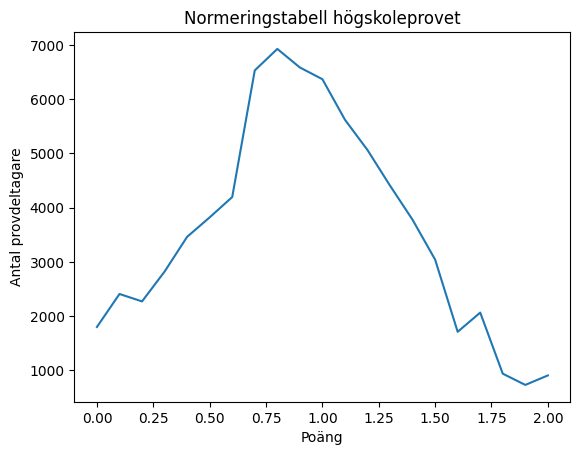

In [ ]:
# Plotta normeringstabellen med seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Convert the dataframe to numeric, skipping the first column
df_normering.iloc[:,1:] = df_normering.iloc[:,1:].apply(pd.to_numeric)


# # Plot the data
plt.figure()
plt.plot(df_normering['Normerad poäng'], df_normering['Antal provdeltagare'])
plt.xlabel('Poäng')
plt.ylabel('Antal provdeltagare')
plt.title('Normeringstabell högskoleprovet')
plt.show()




Från hemsidan vet vi att högskoleprovet följer en normalfördelning med medelvärde $\mu = 0.91$ och standardavvikelse $\sigma = 0.45$. 

Låt oss se hur väl detta passar med vår data:

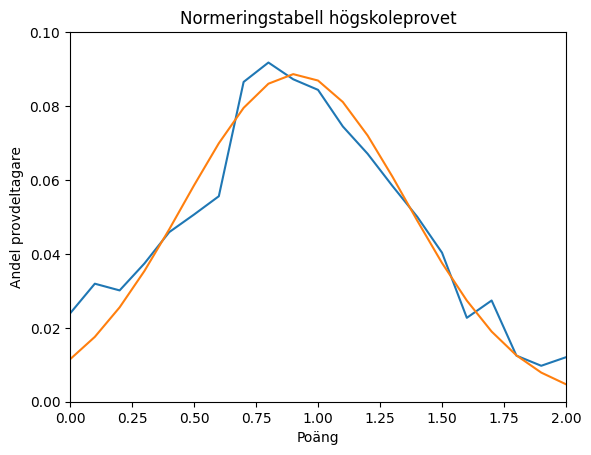

In [ ]:
# Beräkna antalet provdeltagare
number_of_perticipants = df_normering['Antal provdeltagare'].sum()

# Plotta fördelning av poäng hos deltagarna
plt.figure()
plt.plot(df_normering['Normerad poäng'], df_normering['Antal provdeltagare'] / number_of_perticipants)

# Plotta normalfördelning med värden från normeringstabellen
mu = 0.91
sigma = 0.45

step = 0.1
x, y = normal_distribution(mu, sigma, start=0, end=2.1, step=step)
y = y * step
plt.plot(x, y)

plt.xlim([0,2])
plt.ylim([0, 0.1])
plt.xlabel('Poäng')
plt.ylabel('Andel provdeltagare')
plt.title('Normeringstabell högskoleprovet')
plt.show()

# Centrala gränsvärdesatsen
Centrala gränsvärdesatsen säger att om vi har en slumpmässig variabel $X$ med en viss fördelning och vi tar många oberoende värden av $X$ och summerar dem, så kommer summan att följa en normalfördelning.


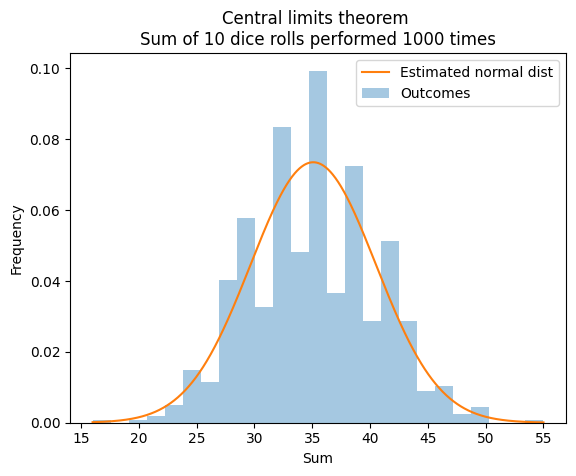

In [ ]:
import math 
import random
import seaborn as sns
%matplotlib inline

# Skapa en funktion som returnerar en normalfördelad variabel
def normpdf(x, mean, std):
    out = np.zeros(len(x))
    
    denom = 1 / (2*math.pi*std**2)**0.5
    exp = math.e**(-(x - mean)**2 / (2*std**2))
    
    out = denom * exp
    
    return out

# Parameter till slumpgeneratorn
n_dice = 10         # Antal tärningar
n_times = 1000      # Antal tärningskast

# Summera tärningskast
current_sum = 0
outcomes = np.zeros(n_times)
for i in range(n_times):
    for j in range(n_dice):
        current_sum += random.randint(1, 6)
        
    outcomes[i] = current_sum
    current_sum = 0

# Histogram av summorna
sns.distplot(outcomes, kde=False, norm_hist=True)    

# Normalfördelning
x = np.linspace(outcomes.min(), outcomes.max(), 1000)
y = normpdf(x, outcomes.mean(), outcomes.std())
plt.plot(x, y)

# Title
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.title(f"Central limits theorem \nSum of {n_dice} dice rolls performed {n_times} times")
plt.legend(["Estimated normal dist", "Outcomes"])

# Multivariat normalfördelning
Multivariat normalfördelning är en fördelning som är beroende av varandra. Detta innebär att vi kan hantera fall där ett slumförsök är beroende av ett annat slumförsök. Vi behöver såldes känna till kovariansen mellan variablerna.

Normalfördelningen i det multivariata fallet definieras som följande:

$$f(x) = \frac{1}{\sqrt{(2\pi)^{n}|\Sigma|}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$$
där $\mu$ är en medelvärdesvektor och $\Sigma$ är kovariansmatrisen.

## Exempel
Tidigare har vi sett att Iris-setosa och Iris-veriscolor har tydliga skillnader i sina foderblad. Låt oss försöka modellera dessa skillnader med hjälp av en multivariat normalfördelning. 

För att kunna modellera dessa skillnader behöver vi först beräkna kovariansmatrisen. Vi kan göra detta genom att använda oss av följande formel:

$$\Sigma = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$


In [ ]:
from scipy.stats import multivariate_normal
%matplotlib inline

# Calculate covariance matrix between sepal length and sepal width for Iris-setosa
cov_setosa = df_2_class[df_2_class['class'] == 'Iris-setosa'][['sepallength', 'sepalwidth']].cov()
print(f"Sigma = \n{cov_setosa}")


Sigma = 
             sepallength  sepalwidth
sepallength     0.124249    0.100298
sepalwidth      0.100298    0.145180


Sedan behöver vi beräkna medelvärdet för varje variabel. Vi kan göra detta genom att använda oss av följande formel för varje variabel $k$:

$$\mu_k = \frac{1}{n} \sum_{i=1}^{n} x_{k_i}$$

In [ ]:
print((cov_setosa.iloc[0, 0] * cov_setosa.iloc[1, 1]))
cov_setosa.iloc[0,0]

0.018038416143273645


0.12424897959183674

In [ ]:
mu_length_setosa = df_2_class[df_2_class['class'] == 'Iris-setosa']['sepallength'].mean()
mu_width_setosa = df_2_class[df_2_class['class'] == 'Iris-setosa']['sepalwidth'].mean()

print(f"Medelvärde foderbladslängd: {mu_length_setosa}")
print(f"Medelvärde foderbladsbredd: {mu_width_setosa}")

Medelvärde foderbladslängd: 5.006
Medelvärde foderbladsbredd: 3.418


Detta ger oss alla delar för att kunna ställa upp en multivariat normalfördelning:

$$
\Sigma = 
\begin{pmatrix}
\sigma_1^2 & \sigma_{1,2} \\
\sigma_{2,1} & \sigma_2^2
\end{pmatrix}
=
\begin{pmatrix}
 0.124249  &  0.100298 \\
 0.100298  &  0.145180
\end{pmatrix}
$$

$$
\mu =
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
=
\begin{pmatrix}
5.006 \\
3.418
\end{pmatrix}
$$


Vi är nu redo att ställa upp den multivariata normalfördelningen för Iris-setosa.

In [ ]:
# Contour plot of multivariate normal distribution for Iris-setosa
x = np.linspace(3.5,7.5,500)
y = np.linspace(1.5,5,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv_setosa = multivariate_normal([mu_length_setosa, mu_width_setosa], cov_setosa)

Nu har vi en multivariat normalfördelning som vi kan använda för att beräkna sannolikheten att en blomma är av typen Iris-setosa baserat på dess foderbladslängd och bredd.

Låt oss se hur väl den passar till den data som vi har:

<Figure size 1000x1000 with 0 Axes>

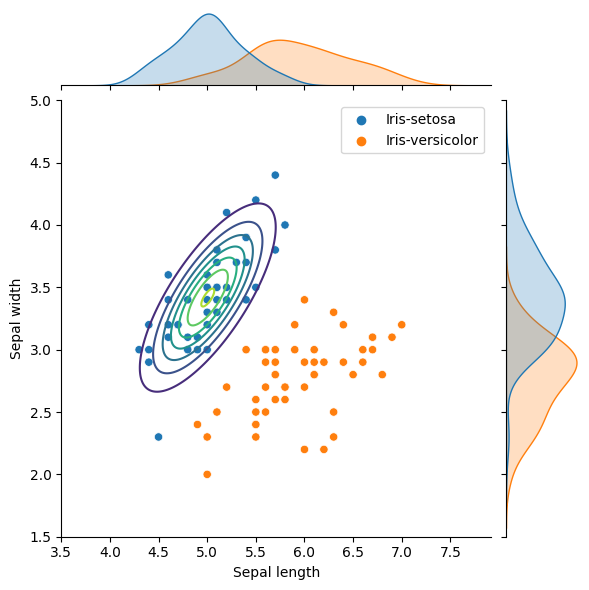

In [ ]:
# Make a contour plot
plt.figure(figsize=(10,10))
sns.jointplot(data=df_2_class, x="sepallength", y="sepalwidth", kind="scatter", hue="class")
plt.contour(X, Y, rv_setosa.pdf(pos))
# plt.title('Contour plot of multivariate normal distribution for Iris-setosa')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

##### Nu gör vi samma sak för Iris-veriscolor:

             sepallength  sepalwidth
sepallength     0.266433    0.085184
sepalwidth      0.085184    0.098469


<Figure size 1000x1000 with 0 Axes>

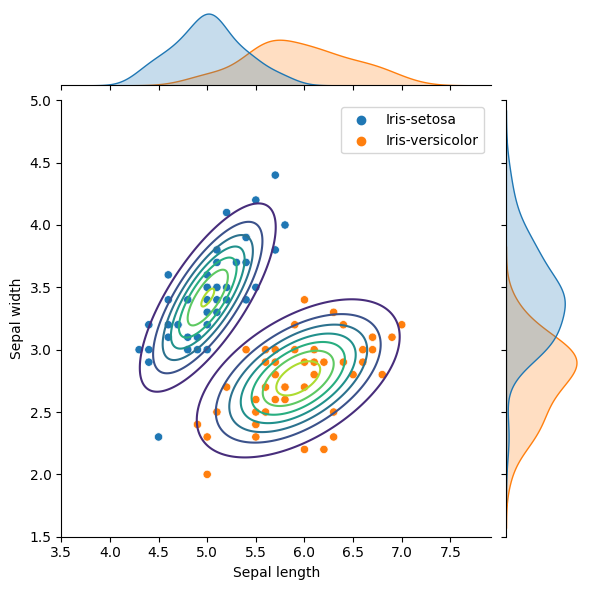

In [ ]:
# Create model for Iris-versicolor
# Calculate covariance matrix between sepal length and sepal width for Iris-versicolor
cov_versicolor = df_2_class[df_2_class['class'] == 'Iris-versicolor'][['sepallength', 'sepalwidth']].cov()
print(cov_versicolor)

mu_length_versicolor = df_2_class[df_2_class['class'] == 'Iris-versicolor']['sepallength'].mean()
mu_width_versicolor = df_2_class[df_2_class['class'] == 'Iris-versicolor']['sepalwidth'].mean()

# Contour plot of multivariate normal distribution for Iris-versicolor
rv_veriscolor = multivariate_normal([mu_length_versicolor, mu_width_versicolor], cov_versicolor)

# Make a contour plot with both distributions
plt.figure(figsize=(10,10))
sns.jointplot(data=df_2_class, x="sepallength", y="sepalwidth", kind="scatter", hue="class")
plt.contour(X, Y, rv_setosa.pdf(pos))
plt.contour(X, Y, rv_veriscolor.pdf(pos))

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


